## Importing Libraries

In [3]:
import csv
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle

#  Reading CSV Files
#### Read all 4 files.

In [4]:
#1)Read CSV File: OPEL
df_opel = pd.read_csv('data/opel_corsa_01.csv', sep=";")
df_opel_2 = pd.read_csv('data/opel_corsa_02.csv', sep=";")
df_peugeot = pd.read_csv('data/peugeot_207_01.csv', sep=";")
df_peugeot_2 = pd.read_csv('data/peugeot_207_02.csv', sep=";")

## Do some initial analysis of the data.
#### Check if all datasets have the same data types.

In [5]:
if df_opel.dtypes.all() == df_opel_2.dtypes.all() == df_peugeot.dtypes.all() == df_peugeot_2.dtypes.all():
    print('All files have the same number of attributes with the same data types')
else:
    print('All files DO NOT have the same number of attributes with the same data types')

All files have the same number of attributes with the same data types


#### The datasets all have the same structure so let's look at the columns.

In [6]:
# Printing all columns
df_opel.columns

Index(['Unnamed: 0', 'AltitudeVariation', 'VehicleSpeedInstantaneous',
       'VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedVariation',
       'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature',
       'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow',
       'IntakeAirTemperature', 'VerticalAcceleration',
       'FuelConsumptionAverage', 'roadSurface', 'traffic', 'drivingStyle'],
      dtype='object')

#### ... and show the datatypes.

In [7]:
df_opel.dtypes.all

<bound method NDFrame._add_numeric_operations.<locals>.all of Unnamed: 0                     int64
AltitudeVariation            float64
VehicleSpeedInstantaneous    float64
VehicleSpeedAverage          float64
VehicleSpeedVariance         float64
VehicleSpeedVariation        float64
LongitudinalAcceleration     float64
EngineLoad                   float64
EngineCoolantTemperature       int64
ManifoldAbsolutePressure       int64
EngineRPM                      int64
MassAirFlow                  float64
IntakeAirTemperature           int64
VerticalAcceleration         float64
FuelConsumptionAverage       float64
roadSurface                   object
traffic                       object
drivingStyle                  object
dtype: object>

#### Now have a look at their shape - attributes and rows

In [8]:
shapes_list = list(df_opel.shape) + list(df_opel_2.shape) + list(df_peugeot.shape) + list(df_peugeot_2.shape)
shapes_list

[7038, 18, 4092, 18, 8199, 18, 4446, 18]

#### Obversations so far :
- The number of attributes is the same on all 4 files (18).
- The number of rows varies between 4,092 up to 8,199

#### Now look at the 4 files individually.

In [9]:
df_opel

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.810000,24,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,60,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.650000,22,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,61,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.850000,21,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,62,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.210000,20,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,63,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.910000,21,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,7387,-4.900024,110.788551,114.248823,37.916017,1.801430,0.0273,17.647058,82,111,2216,18.010000,21,0.1406,9.631930,SmoothCondition,LowCongestionCondition,EvenPaceStyle
7034,7388,-5.200012,110.788551,114.079938,37.335264,0.000000,0.0625,23.137255,82,112,2209,16.900000,20,0.1289,9.565511,SmoothCondition,LowCongestionCondition,EvenPaceStyle
7035,7389,-5.000000,111.689278,113.914806,36.446619,0.900726,0.0391,29.803923,82,113,2208,18.760000,20,0.1016,9.495973,SmoothCondition,LowCongestionCondition,EvenPaceStyle
7036,7390,-5.200012,111.013740,113.693379,34.711628,-0.675537,0.0625,37.647060,82,120,2210,21.690001,21,0.0742,9.433368,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [10]:
df_opel_2

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,44,0.599976,3.828060,8.147763,25.316045,-1.576261,7.1411,46.274509,42,99,899,6.20,19,16.9427,35.635880,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,45,0.600037,5.629500,8.234082,24.411716,1.801440,6.9776,56.470589,42,101,1066,10.96,19,17.0199,36.048752,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,46,0.700012,8.106480,8.346672,23.596122,2.476980,7.1102,34.509804,42,102,1629,10.93,22,17.0740,36.117695,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,47,0.699951,9.232380,8.466768,22.917750,1.125900,7.1609,27.843138,42,103,1629,12.85,22,17.0855,36.160938,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,48,0.500000,11.709359,8.643159,22.150958,2.476979,7.2194,4.705883,42,104,1849,14.82,22,17.0393,36.187778,SmoothCondition,LowCongestionCondition,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,4323,-2.800003,64.176300,57.469687,76.346241,-0.900719,0.3050,17.254902,83,108,2009,14.36,18,-0.0039,8.389318,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4088,4324,-2.800003,63.275578,57.616054,76.745659,-0.900722,0.3830,20.784313,83,109,1996,13.83,18,0.0234,8.357814,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4089,4325,-2.800003,62.600033,57.754915,76.957120,-0.675545,0.4370,18.823530,82,108,1982,13.81,18,0.0469,8.332450,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4090,4326,-2.800003,62.600033,57.859999,77.307649,0.000000,0.4960,11.764706,82,106,1952,13.38,18,0.0586,8.305367,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [11]:
df_peugeot

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-13.399994,20.699999,6.060000,115.840061,-4.500000,1.0548,38.039215,31.0,101.0,798.0,6.22,15.0,-0.5982,27.919697,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,60,-13.200005,17.100000,6.345000,117.200816,-3.599998,0.9012,38.039215,31.0,101.0,797.5,6.27,15.0,-0.5244,26.458355,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,61,-13.200005,14.400000,6.585000,117.559595,-2.700001,0.9331,90.588234,32.0,101.0,797.5,6.27,15.0,-0.5068,26.458355,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,62,-11.800003,14.400000,6.825000,117.801222,0.000000,0.9878,90.588234,32.0,101.0,726.0,8.63,15.0,-0.4882,26.004126,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,63,-19.800003,14.400000,7.065000,117.925697,0.000000,1.1316,92.941177,32.0,101.0,784.0,8.88,15.0,-0.6712,25.295498,SmoothCondition,LowCongestionCondition,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,8609,-0.500000,0.000000,26.114999,128.927056,0.000000,2.1969,30.196079,79.0,103.0,751.0,4.24,30.0,-1.5839,14.492782,UnevenCondition,LowCongestionCondition,EvenPaceStyle
8195,8610,0.000000,0.000000,25.395000,135.011667,0.000000,2.1127,30.196079,79.0,103.0,751.5,4.30,31.0,-1.5508,14.492782,UnevenCondition,LowCongestionCondition,EvenPaceStyle
8196,8611,-0.099998,0.000000,24.735000,142.079260,0.000000,2.0643,30.980392,79.0,103.0,749.5,4.13,31.0,-1.5224,14.492782,UnevenCondition,LowCongestionCondition,EvenPaceStyle
8197,8612,0.500000,0.000000,24.075000,148.260888,0.000000,1.8881,29.411766,79.0,103.0,751.5,4.24,31.0,-1.5938,14.492782,UnevenCondition,LowCongestionCondition,EvenPaceStyle


In [12]:
df_peugeot_2

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-0.599998,24.299999,8.720689,46.843772,6.299999,-1.2903,67.058823,26,115,1809.0,22.360001,15,0.1468,28.784592,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
1,60,0.099998,27.900000,9.045762,52.270798,3.600000,-1.4038,0.000000,26,107,947.5,23.129999,17,0.2022,28.728073,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
2,61,-0.200001,30.599998,9.405000,59.127937,2.699999,-1.3209,28.235294,26,103,797.0,10.130000,17,0.1834,27.799021,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
3,62,-0.899998,29.699999,9.900000,64.360674,-0.900000,-1.4974,0.000000,26,101,1112.0,6.050000,15,0.2099,26.150261,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
4,63,-0.900002,28.799999,10.380000,68.519589,-0.900000,-1.3275,71.764709,26,102,1150.0,11.740000,15,0.2898,25.721266,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,4618,1.000000,28.799999,28.559999,57.190571,3.600000,-0.0292,25.882353,81,115,1755.5,20.469999,25,-0.1661,14.578003,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4442,4619,1.699997,30.599998,28.529999,57.010266,1.799999,-0.0304,11.764706,81,106,736.5,17.740000,25,-0.1987,14.585642,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4443,4620,1.800003,29.699999,28.499999,56.883045,-0.900000,-0.1684,98.039215,81,106,1254.0,9.520000,24,-0.1156,14.547294,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4444,4621,2.100006,29.699999,28.409999,56.160910,0.000000,-0.0644,79.607841,80,112,1254.0,14.910000,23,-0.0760,14.546828,SmoothCondition,LowCongestionCondition,EvenPaceStyle


### Now, check how many nulls exist on each dataframe.¶

In [13]:
print('Nulls in df_opel     : ', sum(df_opel.isnull().sum()))
print('Nulls in df_opel_2   : ', sum(df_opel_2.isnull().sum()))
print('Nulls in df_peugeot  : ', sum(df_peugeot.isnull().sum()))
print('Nulls in df_peugeot_2: ', sum(df_peugeot_2.isnull().sum()))

Nulls in df_opel     :  0
Nulls in df_opel_2   :  0
Nulls in df_peugeot  :  38
Nulls in df_peugeot_2:  6


#### The 2 opel files have no nulls, the peugeot have some so we need to investigate to see where they are.

In [14]:
df_peugeot.isnull().sum()

Unnamed: 0                   0
AltitudeVariation            0
VehicleSpeedInstantaneous    3
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   5
EngineCoolantTemperature     5
ManifoldAbsolutePressure     5
EngineRPM                    5
MassAirFlow                  5
IntakeAirTemperature         5
VerticalAcceleration         0
FuelConsumptionAverage       5
roadSurface                  0
traffic                      0
drivingStyle                 0
dtype: int64

In [15]:
df_peugeot_2.isnull().sum()

Unnamed: 0                   0
AltitudeVariation            0
VehicleSpeedInstantaneous    6
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
roadSurface                  0
traffic                      0
drivingStyle                 0
dtype: int64

### Handling Nan Values

In [16]:
df_peugeot_2

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-0.599998,24.299999,8.720689,46.843772,6.299999,-1.2903,67.058823,26,115,1809.0,22.360001,15,0.1468,28.784592,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
1,60,0.099998,27.900000,9.045762,52.270798,3.600000,-1.4038,0.000000,26,107,947.5,23.129999,17,0.2022,28.728073,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
2,61,-0.200001,30.599998,9.405000,59.127937,2.699999,-1.3209,28.235294,26,103,797.0,10.130000,17,0.1834,27.799021,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
3,62,-0.899998,29.699999,9.900000,64.360674,-0.900000,-1.4974,0.000000,26,101,1112.0,6.050000,15,0.2099,26.150261,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
4,63,-0.900002,28.799999,10.380000,68.519589,-0.900000,-1.3275,71.764709,26,102,1150.0,11.740000,15,0.2898,25.721266,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,4618,1.000000,28.799999,28.559999,57.190571,3.600000,-0.0292,25.882353,81,115,1755.5,20.469999,25,-0.1661,14.578003,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4442,4619,1.699997,30.599998,28.529999,57.010266,1.799999,-0.0304,11.764706,81,106,736.5,17.740000,25,-0.1987,14.585642,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4443,4620,1.800003,29.699999,28.499999,56.883045,-0.900000,-0.1684,98.039215,81,106,1254.0,9.520000,24,-0.1156,14.547294,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4444,4621,2.100006,29.699999,28.409999,56.160910,0.000000,-0.0644,79.607841,80,112,1254.0,14.910000,23,-0.0760,14.546828,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [39]:
df_peugeot = df_peugeot.dropna()
df_peugeot_2 = df_peugeot.dropna()
df_peugeot

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-13.399994,20.699999,6.060000,115.840061,-4.500000,1.0548,38.039215,31.0,101.0,798.0,6.22,15.0,-0.5982,27.919697,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,60,-13.200005,17.100000,6.345000,117.200816,-3.599998,0.9012,38.039215,31.0,101.0,797.5,6.27,15.0,-0.5244,26.458355,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,61,-13.200005,14.400000,6.585000,117.559595,-2.700001,0.9331,90.588234,32.0,101.0,797.5,6.27,15.0,-0.5068,26.458355,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,62,-11.800003,14.400000,6.825000,117.801222,0.000000,0.9878,90.588234,32.0,101.0,726.0,8.63,15.0,-0.4882,26.004126,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,63,-19.800003,14.400000,7.065000,117.925697,0.000000,1.1316,92.941177,32.0,101.0,784.0,8.88,15.0,-0.6712,25.295498,SmoothCondition,LowCongestionCondition,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,8609,-0.500000,0.000000,26.114999,128.927056,0.000000,2.1969,30.196079,79.0,103.0,751.0,4.24,30.0,-1.5839,14.492782,UnevenCondition,LowCongestionCondition,EvenPaceStyle
8195,8610,0.000000,0.000000,25.395000,135.011667,0.000000,2.1127,30.196079,79.0,103.0,751.5,4.30,31.0,-1.5508,14.492782,UnevenCondition,LowCongestionCondition,EvenPaceStyle
8196,8611,-0.099998,0.000000,24.735000,142.079260,0.000000,2.0643,30.980392,79.0,103.0,749.5,4.13,31.0,-1.5224,14.492782,UnevenCondition,LowCongestionCondition,EvenPaceStyle
8197,8612,0.500000,0.000000,24.075000,148.260888,0.000000,1.8881,29.411766,79.0,103.0,751.5,4.24,31.0,-1.5938,14.492782,UnevenCondition,LowCongestionCondition,EvenPaceStyle


#### Check for Nan values.

In [40]:
print('Nulls in df_opel     : ', sum(df_opel.isnull().sum()))
print('Nulls in df_opel_2   : ', sum(df_opel_2.isnull().sum()))
print('Nulls in df_peugeot  : ', sum(df_peugeot.isnull().sum()))
print('Nulls in df_peugeot_2: ', sum(df_peugeot_2.isnull().sum()))

Nulls in df_opel     :  0
Nulls in df_opel_2   :  0
Nulls in df_peugeot  :  0
Nulls in df_peugeot_2:  0


## Summary of observations after initial data analysis.
  -  All files have the same number of attributes with the same data types.
  -  The Opel data has no NULL values.
  -  The Peugeot data has a small number of NULLS that need to be handled.

#### Driving style is the only target class attricute that can be easily ued for a binary classification algorithm.
Our interest is in binary classification so we need to remove the other class attributes from the target.

### Because the project document indicates that the datasets may be imbalanced, and we know that the sample sizes are different from looking at their shape, it's worthwhile using pandas .mean() to get the column mean for each file.  This may indicate how imbalanced the files are.

#### To see how the files compare, look at the mean values and compare.

In [74]:
# create a dataframe
df_mean_values = pd.DataFrame({'opel1': df_opel.mean(), 
                      'opel_2': df_opel_2.mean(), 
                      'peugeot': df_peugeot.mean(), 
                      'peugeot_2':df_peugeot_2.mean()}) 

# Drop the first row as it is the index and not relevant as a mean.
df_mean_values = df_mean_values.iloc[1: , :]

# show the dataframe
df_mean_values

,opel1,opel_2,peugeot,peugeot_2
AltitudeVariation,-0.675845,-0.139590,-0.167664,-0.167664
VehicleSpeedInstantaneous,36.428319,43.482246,46.650475,46.650475
VehicleSpeedAverage,36.723932,43.419217,46.894651,46.894651
VehicleSpeedVariance,213.004353,162.980180,159.627444,159.627444
VehicleSpeedVariation,-0.029563,-0.011556,-0.008240,-0.008240
LongitudinalAcceleration,0.143530,1.603635,1.127712,1.127712
EngineLoad,26.487416,34.509613,45.087221,45.087221
EngineCoolantTemperature,77.924979,73.378299,68.188599,68.188599
ManifoldAbsolutePressure,116.234157,123.764907,115.251343,115.251343
EngineRPM,1569.145354,1656.040811,1520.502319,1520.502319


## Now visualise it.

#### The initial look at the data tells us that there are indeed some imbalances between the files.  
 - For instance, VehicleSpeedInstantaneous varies from 22.962508 up to 46.627707, and that's just between the 2 peugeot files.
 - IntakeAirTemperature varies between 16.048878 and 33.897120, over a 100% difference.          

#### We need to look at the overall mean of the data and this may show the imbalances in a better light.
  -  We will randomise a concatenation of the datasets on the assumption that they are imbalanced.  
  -  We can then use the .mean() function to compare the means of the individual datasets to the total means. 

     

<AxesSubplot:>

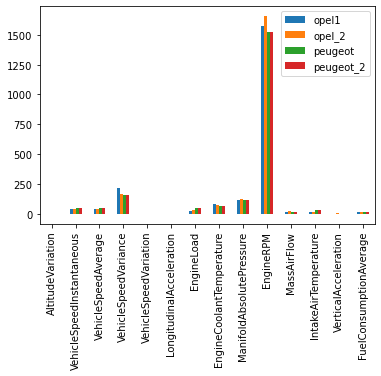

In [75]:
df_mean_values.plot(kind='bar')

#### There is a bit of variance in EngineRPM but the main message from this is that we need to scale the data if we want to keep EngineRPM as a feature.  Drop it and look at the rest.

<AxesSubplot:>

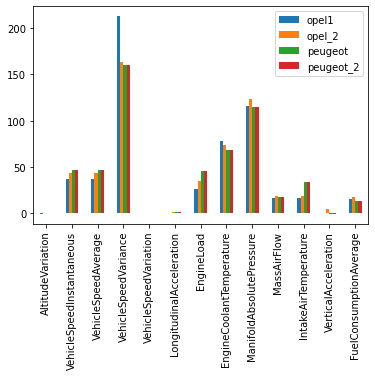

In [76]:
# Drop EngineRPM and look again.
#f_mean_values1 = df_mean_values.drop(['EngineRPM'],inplace=True)
df_mean_values1 = df_mean_values.drop(['EngineRPM'])
df_mean_values1.plot(kind='bar')

#### Again, there is a bit of variance in VehicleSpeedVariance.  This is starting to show that there is indeed some imbalance between the files so we need to make sure that the data is merged and shuffled. <br/>

Drop VehicleSpeedVariance and look again.

<AxesSubplot:>

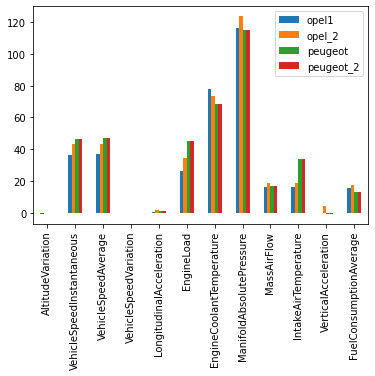

In [77]:
df_mean_values2 = df_mean_values1.drop(['VehicleSpeedVariance'])
df_mean_values2.plot(kind='bar')

#### These all look OK so drop them and continue to look at the rest.

  -  ManifoldAbsolutePressure
  -  EngineCoolantTemperature
  -  FuelConsumptionAverage
  -  MassAirFlow


<AxesSubplot:>

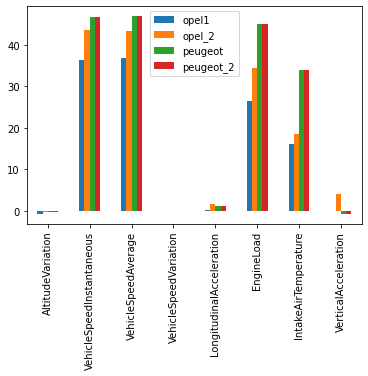

In [78]:
df_mean_values2.drop(['ManifoldAbsolutePressure'],inplace=True)
df_mean_values2.drop(['EngineCoolantTemperature'],inplace=True)
df_mean_values2.drop(['FuelConsumptionAverage'],inplace=True)
df_mean_values3 = df_mean_values2.drop(['MassAirFlow'])
df_mean_values3.plot(kind='bar')


## A couple of more observations:
  -  VehicleSpeedInstantaneous and VehicleSpeedAverage show a variance across all 4 files and an even greater variance in the 2 peugeot trips.  This alone is a justification for concatenating and shuffling teh data before we use it for training and testing.
  -  The shape of these 2 columns is almost exactly the same which implies that we can drop one as a feature as their sameness means that we can drop one and keep one.  This will have no effect on the model except to make it more efficient.

<AxesSubplot:>

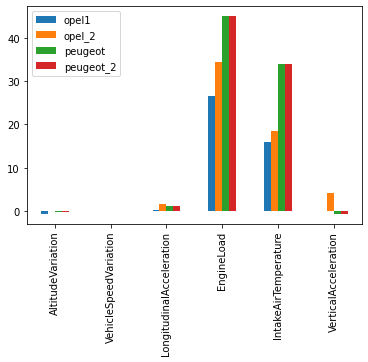

In [79]:
# Drop VehicleSpeedInstantaneous and VehicleSpeedAverage
df_mean_values3.drop(['VehicleSpeedInstantaneous'],inplace=True)
df_mean_values4 = df_mean_values3.drop(['VehicleSpeedAverage'])
df_mean_values4.plot(kind='bar')


#### EngineLoad and IntakeAirTemperature look OK so drop them and look at what's left.

<AxesSubplot:>

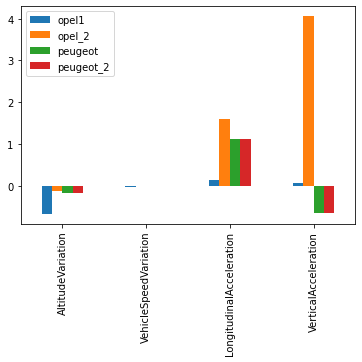

In [80]:
# Drop the first row as it is the index and not relevant as a mean.
df_mean_values4.drop(['EngineLoad'],inplace=True)
df_mean_values5 = df_mean_values4.drop(['IntakeAirTemperature'])
df_mean_values5.plot(kind='bar')

#### There is nothing more to see except for more evidence of huge variations across the 4 files, supporting futrher, teh need to merge and shuffle the file data.

### Another way to compare the files is to describe them individually and then merge and sort them to compare stats numerically.  It depends on which way you are more comfortable understanding the data.

In [81]:
df_opela = df_opel.describe()
df_opela.insert(loc = 0,column = 'file',value = 'opel_01')
df_opel_2a = df_opel_2.describe()
df_opel_2a.insert(loc = 0,column = 'file',value = 'opel_02')
df_peugeota = df_peugeot.describe()
df_peugeota.insert(loc = 0,column = 'file',value = 'peugeot_01')
df_peugeot_2a = df_peugeot_2.describe()
df_peugeot_2a.insert(loc = 0,column = 'file',value = 'peugeot_2')
df_all = pd.concat([df_opela,df_opel_2a,df_peugeota,df_peugeot_2a])
df_all.reset_index(level=0, inplace=True)
df_all = df_all.sort_values(['index', 'file'])
df_all

,index,file,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
4,25%,opel_01,1936.250000,-1.500000,8.782019,16.698035,54.333652,-0.900722,-0.339800,13.725491,79.000000,102.000000,936.000000,8.080000,12.000000,-0.222700,12.319374
12,25%,opel_02,1125.750000,-2.800003,11.259000,14.868447,42.682230,-0.900719,-0.254950,20.000000,64.000000,101.000000,1087.000000,8.445000,16.000000,-0.007800,11.634232
20,25%,peugeot_01,2118.750000,-1.300003,18.900000,19.638749,41.336768,-0.900000,0.578475,23.137255,56.000000,103.000000,898.375000,7.300000,24.000000,-1.052600,10.085566
28,25%,peugeot_2,2118.750000,-1.300003,18.900000,19.638749,41.336768,-0.900000,0.578475,23.137255,56.000000,103.000000,898.375000,7.300000,24.000000,-1.052600,10.085566
5,50%,opel_01,3813.500000,-0.399963,29.273399,28.312631,144.864363,0.000000,0.140800,25.490196,80.000000,109.000000,1659.500000,15.330000,16.000000,0.070300,15.284765
13,50%,opel_02,2188.500000,0.000000,34.452538,26.422996,106.038210,0.000000,0.125000,30.588236,80.000000,110.000000,1762.500000,15.820000,18.000000,0.223000,18.079138
21,50%,peugeot_01,4283.500000,-0.100000,37.799999,35.977499,103.843587,0.000000,1.162350,40.392159,79.000000,107.000000,1496.500000,17.205000,36.000000,-0.649000,12.868828
29,50%,peugeot_2,4283.500000,-0.100000,37.799999,35.977499,103.843587,0.000000,1.162350,40.392159,79.000000,107.000000,1496.500000,17.205000,36.000000,-0.649000,12.868828
6,75%,opel_01,5612.750000,0.100037,54.043198,47.595544,299.377339,0.900721,0.683600,34.901962,81.000000,122.000000,2033.000000,21.690001,19.000000,0.312000,18.393147
14,75%,opel_02,3285.250000,1.024994,70.312449,70.051620,240.313896,0.900722,1.060000,47.843140,83.000000,136.000000,2156.000000,25.330000,20.000000,0.716000,21.760530


### Concatenate and shuffle the data  

We have established that we need to concatenate th 4 data files and shuffle the data before we start to use it for training and testing. <br/>
If we simply concatenate the data from the 4 files, and then split the data for tyraining and testing, the data will be ordered according to the fifferent cars and different trips.  We have established that this gives an imbalance so we need to randomly shuffle the rows so that there’s a mix in the target variable values across the rows.

In [82]:
df_shuffled = shuffle(pd.concat([df_peugeot,df_peugeot_2,df_opel,df_opel_2]))
df_shuffled 

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
1392,1569,-2.000000,17.564037,29.100761,33.231130,3.602878,-0.4020,43.137257,72.0,105.0,1357.0,11.250000,16.0,-0.5000,12.435033,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3646,3941,-1.400024,48.413696,38.595851,277.408741,0.900719,-1.0156,36.470589,80.0,164.0,2176.0,27.530001,12.0,0.6133,16.676195,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3730,3966,-2.800003,26.120880,29.254634,105.601397,-1.576258,0.2580,16.862745,82.0,104.0,1085.0,10.480000,22.0,-0.1680,17.840355,SmoothCondition,LowCongestionCondition,EvenPaceStyle
6812,7166,-2.500000,42.333836,35.094303,168.262934,-1.576263,-0.0586,3.529412,81.0,114.0,1773.0,21.350000,11.0,0.2734,18.916279,SmoothCondition,LowCongestionCondition,EvenPaceStyle
7544,7959,-1.900002,27.900000,13.559999,97.772942,0.900000,1.1882,45.882355,79.0,105.0,1781.5,15.470000,33.0,-0.1273,15.534581,UnevenCondition,LowCongestionCondition,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,2650,-0.299995,92.699997,104.609998,14.754817,-1.800003,2.3794,0.000000,79.0,120.0,2125.5,29.129999,44.0,-0.4714,9.025735,SmoothCondition,LowCongestionCondition,EvenPaceStyle
5218,5463,0.799995,0.000000,16.395000,82.402852,0.000000,1.5407,33.725491,79.0,103.0,746.5,4.470000,35.0,-0.7305,14.931424,UnevenCondition,LowCongestionCondition,EvenPaceStyle
2589,2825,0.100037,37.605061,43.455986,50.091526,-1.125900,0.4260,25.098040,81.0,105.0,1595.0,10.670000,23.0,-0.0430,16.087461,SmoothCondition,LowCongestionCondition,EvenPaceStyle
8039,8454,1.599998,108.899994,102.644997,29.308954,0.000000,1.0737,79.607841,80.0,135.0,2561.5,28.440001,42.0,-0.8114,10.164303,SmoothCondition,LowCongestionCondition,EvenPaceStyle


## Then make sure that no data is lost in the shuffle.

In [83]:
if df_shuffled.shape[0]  == df_peugeot.shape[0] + df_peugeot_2.shape[0] + df_opel.shape[0] + df_opel_2.shape[0]:
    print('The shuffled data has the same number of rows as the 4 imput files : ',df_shuffled.shape[0])
else:
    print('The shuffled data DOES NOT have of rows as the 4 imput files : ',df_shuffled.shape[0], ' against ', df_peugeot.shape[0] + df_peugeot_2.shape[0] + df_opel.shape[0]+ df_opel_2.shape[0])    

The shuffled data has the same number of rows as the 4 imput files :  27514


In [84]:
df_shuffled.mean() 

Unnamed: 0                   3845.450752
AltitudeVariation              -0.293480
VehicleSpeedInstantaneous      43.564485
VehicleSpeedAverage            43.776130
VehicleSpeedVariance          173.779733
VehicleSpeedVariation          -0.014187
LongitudinalAcceleration        0.946743
EngineLoad                     38.756299
EngineCoolantTemperature       71.450970
ManifoldAbsolutePressure      116.768918
EngineRPM                    1553.102929
MassAirFlow                    17.068457
IntakeAirTemperature           27.043578
VerticalAcceleration            0.231812
FuelConsumptionAverage         14.272438
dtype: float64

#### Now, looking at the means of the shuffled data against the extremes of the highs and lows for VehicleSpeedInstantaneous, 38.64453 sits a lot better against 22.962508 and 46.627707.  

#### And the overall mean for IntakeAirTemperature is 23.483004, which brings the variances 16.048878 and 33.897120 together.

This alone is justification to shuffle the data to remove any bias.  This will give us a much more even dataset to use for training, testing and evaluation against the algorithm.

# Select a class column for the models.

In [85]:
df_shuffled.groupby('roadSurface').size()

roadSurface
FullOfHolesCondition     3766
SmoothCondition         17229
UnevenCondition          6519
dtype: int64

In [86]:
df_shuffled.groupby('traffic').size()

traffic
HighCongestionCondition       1863
LowCongestionCondition       23726
NormalCongestionCondition     1925
dtype: int64

In [87]:
df_shuffled.groupby('drivingStyle').size()

drivingStyle
AggressiveStyle     3055
EvenPaceStyle      24459
dtype: int64

###  Now see the same visually.

C:\Users\m033\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\m033\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\m033\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='traffic', ylabel='count'>

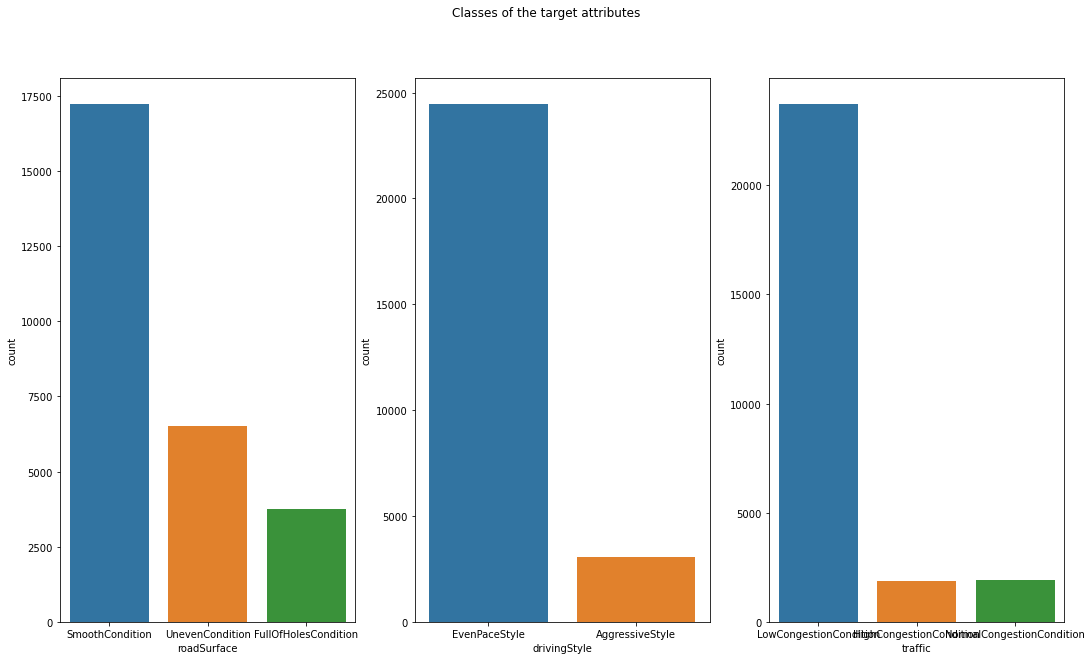

In [88]:
# new
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
  
fig.suptitle('Classes of the target attributes')

#f, axes = plt.subplots(1, 3)
sns.countplot(df_shuffled['roadSurface'], label = "Count", ax=axes[0]) 
sns.countplot(df_shuffled['drivingStyle'], label = "Count", ax=axes[1]) 
sns.countplot(df_shuffled['traffic'], label = "Count", ax=axes[2]) 

## Have a look at the possible outputs:
 - Driving Style
 - Road Surface Condition
 - Traffic
 
### It is important to note the imbalanced data between the classes of the Output labels so we may look at this again as we decide what data to use for sampling.

## Summary of observations after initial data analysis.
  -  All files have the same number of attributes with the same data types.
  -  The Opel data has no NULL values.
  -  The Peugeot data has a small number of NULLS that need to be handled.
  -  The files are imbalanced so to remove any bias, we should randomise the data from the 4 files (data is merged and shuffled). 
  -  We need to scale the data 
  -  The shape VehicleSpeedInstantaneous and VehicleSpeedAverage is almost exactly the same which implies that we can drop one as a feature as their sameness means that we can drop one and keep one.  This will have no effect on the model except to make it more efficient.
  -  Driving Style looks like a good candidate at it is a simple binary classifier.
  - We need to remove the class attributes that we do not want to classify.
 